#Análise de reservas em hotéis

###**Resort Hotel e City Hotel**

###**Problema de negócio**: Ambos os hóteis a serem analisados vem notando altas taxas de cancelamento, resultando em receitas menores e um uso abaixo do esperado dos quartos.
###**Objetivo da análise:** Buscar entender o que tem gerado as altas taxas de cancelamento e como o problema poderia ser contornado, aumentando a eficiência na geração de receita.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

resort_hotel = pd.read_csv("H1.csv")
city_hotel = pd.read_csv("H2.csv")

In [ ]:
city_hotel.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate'],
      dtype='object')

In [ ]:
city_hotel.describe()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
count,15593.000000,15593.000000,15593.000000,15593.000000,15593.000000,15593.000000,15593.000000,15593.000000,15589.000000,15593.000000,15593.0,15593.0,15593.0,15593.000000,15593.000000,15593.000000,15593.000000,15593.000000
mean,0.639389,102.551273,2015.592061,27.333611,15.708459,0.778811,2.254858,1.831783,0.079287,0.004233,0.0,0.0,0.0,0.159751,9.091323,96.059911,0.010197,0.285705
std,0.480193,94.831301,0.491468,11.858778,8.541063,0.919827,1.510040,0.475798,0.357299,0.099936,0.0,0.0,0.0,0.640630,30.708274,54.240530,0.100467,0.597701
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,33.000000,2015.000000,18.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,72.250000,0.000000,0.000000
50%,1.000000,77.000000,2016.000000,28.000000,16.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,90.950000,0.000000,0.000000
75%,1.000000,141.000000,2016.000000,37.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,114.300000,0.000000,0.000000
max,1.000000,451.000000,2016.000000,53.000000,31.000000,14.000000,34.000000,4.000000,3.000000,10.000000,0.0,0.0,0.0,20.000000,259.000000,5400.000000,1.000000,4.000000


In [ ]:
resort_hotel.describe()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
count,10423.000000,10423.000000,10423.000000,10423.000000,10423.000000,10423.000000,10423.000000,10423.000000,10423.000000,10423.000000,10423.0,10423.0,10423.0,10423.000000,10422.000000,10422.000000,10422.000000,10422.000000
mean,0.648086,113.614506,2015.703540,30.260674,15.842176,1.278519,3.378394,1.939845,0.129042,0.014103,0.0,0.0,0.0,0.233714,1.380733,91.681019,0.053828,0.509787
std,0.477590,96.832474,0.577013,13.570532,8.934383,1.177593,2.536277,1.119911,0.457924,0.120339,0.0,0.0,0.0,0.668440,12.028232,54.543029,0.227384,0.778545
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,36.000000,2015.000000,20.000000,8.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,54.000000,0.000000,0.000000
50%,1.000000,87.000000,2016.000000,32.000000,16.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,75.335000,0.000000,0.000000
75%,1.000000,169.000000,2016.000000,41.000000,24.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,118.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,55.000000,10.000000,2.000000,0.0,0.0,0.0,17.000000,150.000000,384.000000,2.000000,5.000000


In [ ]:
#Removendo valores nulos
city_hotel = city_hotel.dropna()
city_hotel.isna().sum()

IsCanceled                     0
LeadTime                       0
ArrivalDateYear                0
ArrivalDateMonth               0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       0
Babies                         0
Meal                           0
Country                        0
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DepositType                    0
Agent                          0
Company                        0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
ReservationStatus              0
Reservatio

In [ ]:
resort_hotel = resort_hotel.dropna()
resort_hotel.isna().sum()

IsCanceled                     0
LeadTime                       0
ArrivalDateYear                0
ArrivalDateMonth               0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       0
Babies                         0
Meal                           0
Country                        0
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DepositType                    0
Agent                          0
Company                        0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
ReservationStatus              0
Reservatio

<ipython-input-22-37aaa4fb1f8e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = resort_hotel.corr()


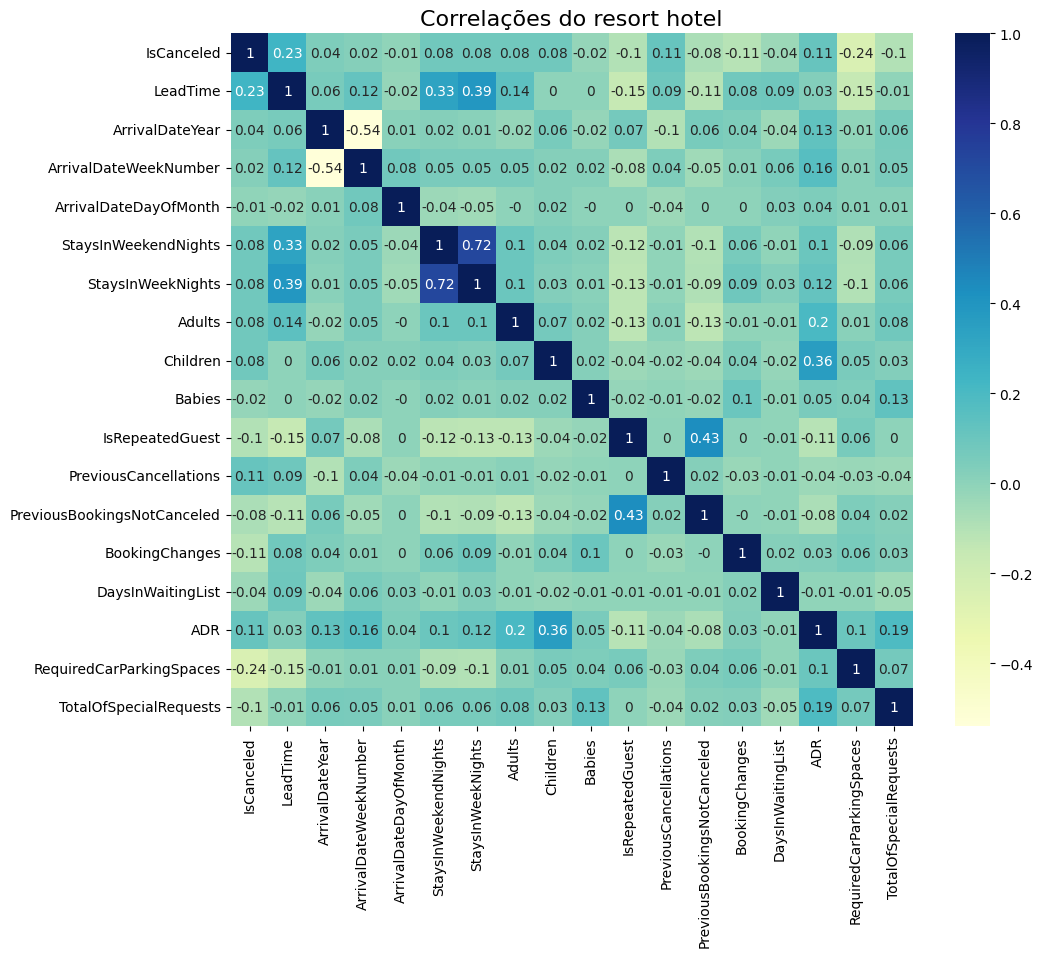

In [ ]:
corr_matrix = resort_hotel.corr()

rounded_corr_matrix = corr_matrix.round(2)

plt.figure(figsize=(11, 9))
ax = sns.heatmap(rounded_corr_matrix, annot=True, cmap="YlGnBu")
ax.set_title("Correlações do resort hotel", fontsize=16)
plt.savefig('Matriz_de_Correlação_resort.png')

plt.show()

A partir da matriz de correlações visualizada em um mapa de calor, podemos começar a ter uma noção do quais fatores estão se correlacionando positivamente ou negativamente com os cancelamentos. Algumas correlações, que apesar de fracas valem destacar são:

- Tempo de antecedência: Há uma correlação de 0,25 para o tempo decorrente entre a reserva e a data de chegada e um possível cancelamento.
- ADR: A tarifa média diária, parece ter alguma influência no cancelamento (0,16)
- Cancelamentos prévios: O fato de terem havido cancelamento prévios também se correlaciona (0,11) com novos cancelamentos.

<ipython-input-23-34858f86a31d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix2 = city_hotel.corr()


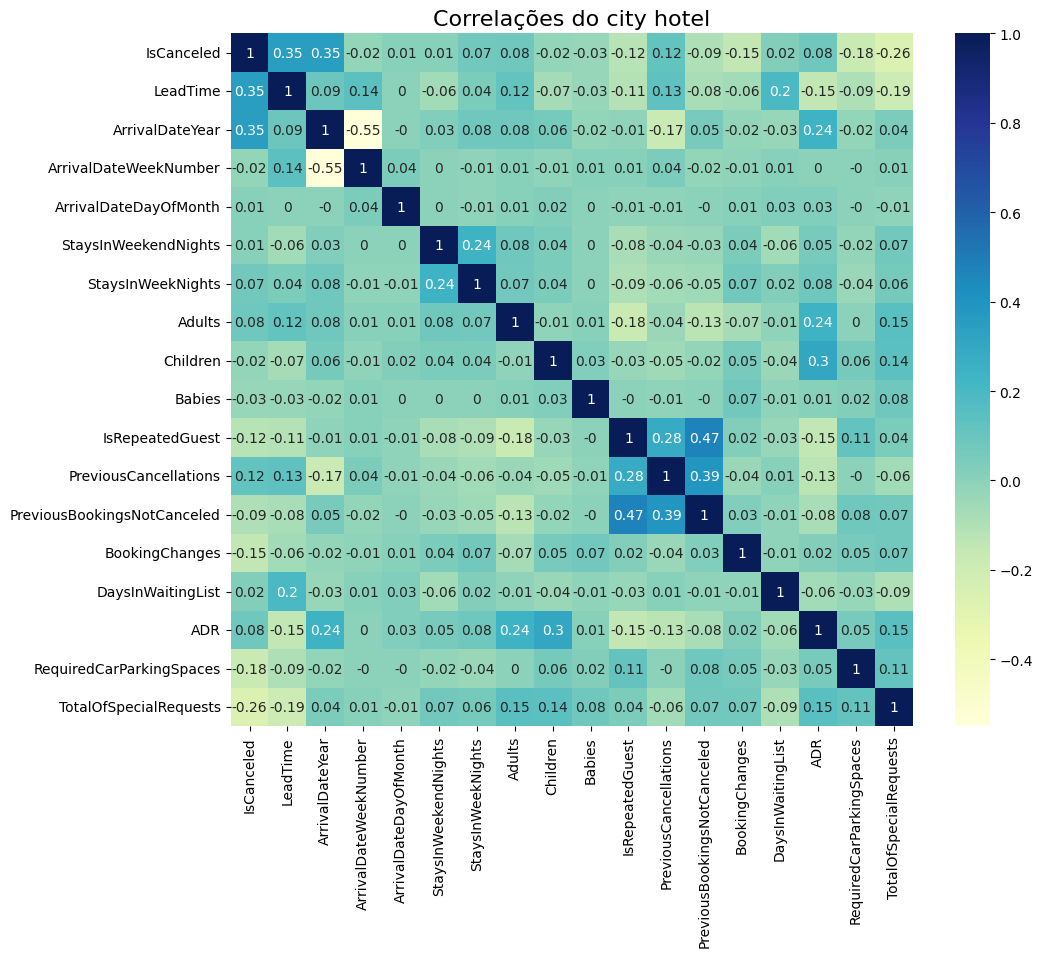

In [ ]:
corr_matrix2 = city_hotel.corr()
rounded_corr_matrix2 = corr_matrix2.round(2)

plt.figure(figsize=(11, 9))
ax = sns.heatmap(rounded_corr_matrix2, annot=True, cmap="YlGnBu")
ax.set_title("Correlações do city hotel", fontsize=16)
plt.savefig('Matriz_de_Correlação_city.png')

plt.show()

Na matriz do city hotel vemos que o padrão se repete, com a diferença que não há correlação entre a taxa de ADR. As variáveis com correlação mais evidente também são tempo de antecedência e cancelamentos prévios. No entanto, apesar de relevantes não explicam completamente a causa dos cancelamentos.


####Para buscar entender o que vem causando as notadas altas taxas de cancelamento, primeiro vamos verificar como tem se comportado a distribuição dos cancelamentos em valores absolutos e ao longo do tempo nos 2 hotéis.

In [ ]:
qtd_de_cancelamentos2 = resort_hotel.IsCanceled.value_counts().reset_index()
qtd_de_cancelamentos2.columns = ['Foi cancelado?', 'Quantidade']
qtd_de_cancelamentos2['Foi cancelado?'].replace({0: 'Não', 1: 'Sim'}, inplace=True)
qtd_de_cancelamentos2['Porcentagem (%)'] = round((qtd_de_cancelamentos2['Quantidade'] / qtd_de_cancelamentos2['Quantidade'].sum()) * 100, 2)
qtd_de_cancelamentos2.loc[len(qtd_de_cancelamentos2)] = ['Total', qtd_de_cancelamentos2['Quantidade'].sum(), 100.00]
qtd_de_cancelamentos2

,Foi cancelado?,Quantidade,Porcentagem (%)
0,Sim,6747,64.79
1,Não,3667,35.21
2,Total,10414,100.00


In [ ]:
qtd_de_cancelamentos = city_hotel.IsCanceled.value_counts().reset_index()
qtd_de_cancelamentos.columns = ['Foi cancelado?', 'Quantidade']
qtd_de_cancelamentos['Foi cancelado?'].replace({0: 'Não', 1: 'Sim'}, inplace=True)
qtd_de_cancelamentos['Porcentagem (%)'] = round((qtd_de_cancelamentos['Quantidade'] / qtd_de_cancelamentos['Quantidade'].sum()) * 100, 2)
qtd_de_cancelamentos.loc[len(qtd_de_cancelamentos)] = ['Total', qtd_de_cancelamentos['Quantidade'].sum(), 100.00]
qtd_de_cancelamentos

,Foi cancelado?,Quantidade,Porcentagem (%)
0,Sim,9951,63.89
1,Não,5623,36.11
2,Total,15574,100.00


Podemos perceber que a porcentagem de cancelamentos do city_hotel foi maior do que do resort hotel. No entanto, o city hotel também possui uma quantidade de reservas quase 2 vezes maior que o resort.

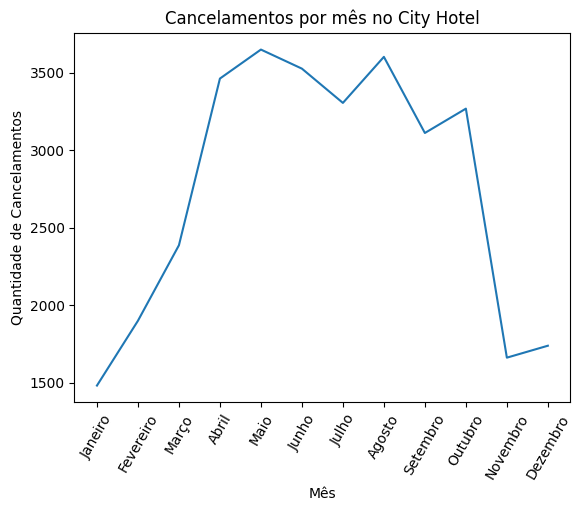

In [ ]:
traduções = {
    'January': 'Janeiro',
    'February': 'Fevereiro',
    'March': 'Março',
    'April': 'Abril',
    'May': 'Maio',
    'June': 'Junho',
    'July': 'Julho',
    'August': 'Agosto',
    'September': 'Setembro',
    'October': 'Outubro',
    'November': 'Novembro',
    'December': 'Dezembro'
}
# Agrupe os dados por mês
cancelamentos_por_mes = city_hotel.groupby('ArrivalDateMonth')['IsCanceled'].sum().reset_index(name='Cancelamentos')
cancelamentos_por_mes = cancelamentos_por_mes.replace(traduções)

# Ordenando os meses
cancelamentos_por_mes["ArrivalDateMonth"] = pd.Categorical(cancelamentos_por_mes["ArrivalDateMonth"],
                             categories=["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"])
cancelamentos_por_mes = cancelamentos_por_mes.sort_values(by='ArrivalDateMonth', ascending = True)

# Crie um gráfico de linhas
plt.plot(cancelamentos_por_mes['ArrivalDateMonth'], cancelamentos_por_mes['Cancelamentos'])
plt.xlabel('Mês')
plt.ylabel('Quantidade de Cancelamentos')
plt.xticks(rotation = 60)
plt.title("Cancelamentos por mês no City Hotel")
plt.savefig('cancelamentos_mes_city.png')


plt.show()

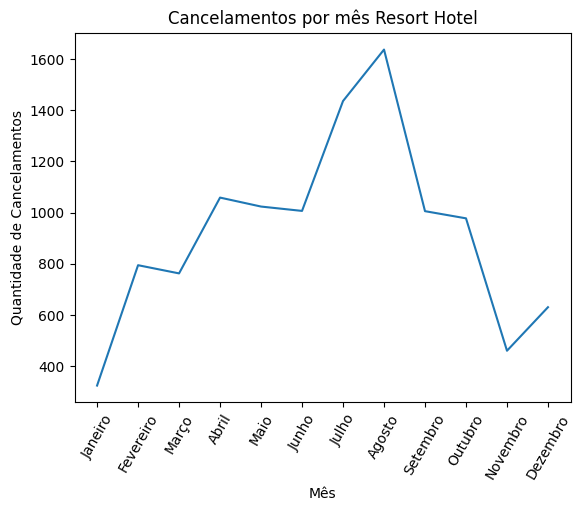

In [ ]:
# Agrupando os dados por mês
cancelamentos_por_mes_resort = resort_hotel.groupby('ArrivalDateMonth')['IsCanceled'].sum().reset_index(name='Cancelamentos')
cancelamentos_por_mes_resort = cancelamentos_por_mes_resort.replace(traduções)

# Ordenando os meses
cancelamentos_por_mes_resort["ArrivalDateMonth"] = pd.Categorical(cancelamentos_por_mes_resort["ArrivalDateMonth"],
                             categories=["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"])
cancelamentos_por_mes_resort = cancelamentos_por_mes_resort.sort_values(by='ArrivalDateMonth', ascending = True)

# Criando um gráfico de linhas
plt.plot(cancelamentos_por_mes_resort['ArrivalDateMonth'], cancelamentos_por_mes_resort['Cancelamentos'])
plt.xlabel('Mês')
plt.ylabel('Quantidade de Cancelamentos')
plt.xticks(rotation = 60)
plt.title('Cancelamentos por mês Resort Hotel')
plt.savefig('cancelamentos_mes_resort.png')

plt.show()

Observando os 2 gráficos, podemos notar um padrão para um maior número de cancelamentos entre os meses de abril e outubro para os 2 hotéis, demonstrando sazonalidade para a alta de cancelamentos. Sendo que no mês de agosto houve um pico de cancelamentos no Resort hotel, enquanto os picos do City Hotel ocorreram em Maio e Agosto.

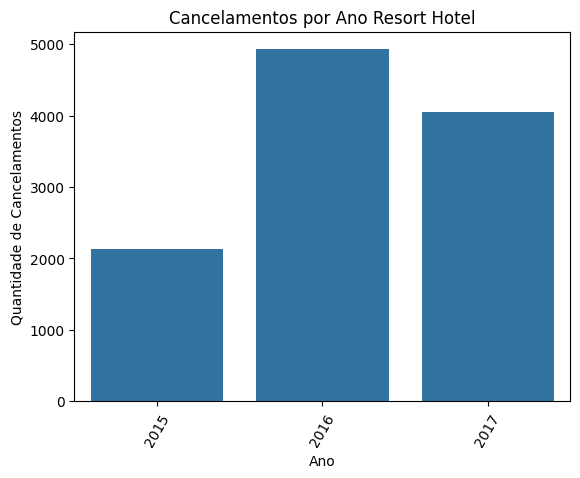

In [ ]:
cancelamentos_por_ano_resort = resort_hotel.groupby('ArrivalDateYear')['IsCanceled'].sum().reset_index(name='Cancelamentos')

# Criando um gráfico de barras
sns.barplot(x = cancelamentos_por_ano_resort['ArrivalDateYear'], y = cancelamentos_por_ano_resort['Cancelamentos'])

plt.xlabel('Ano')
plt.ylabel('Quantidade de Cancelamentos')
plt.xticks(rotation = 60)
plt.title('Cancelamentos por Ano Resort Hotel')
plt.savefig('cancelamentos_ano_resort.png')

plt.show()

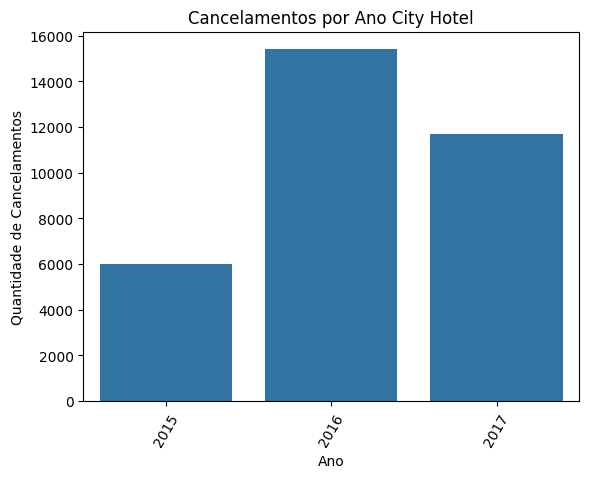

In [ ]:
cancelamentos_por_ano_city = city_hotel.groupby('ArrivalDateYear')['IsCanceled'].sum().reset_index(name='Cancelamentos')

# Criando um gráfico de barras
sns.barplot(x = cancelamentos_por_ano_city['ArrivalDateYear'], y = cancelamentos_por_ano_city['Cancelamentos'])

plt.xlabel('Ano')
plt.ylabel('Quantidade de Cancelamentos')
plt.xticks(rotation = 60)
plt.title('Cancelamentos por Ano City Hotel')
plt.savefig('cancelamentos_ano_city.png')

plt.show()

Vemos o padrão se repetir também nos cancelamentos anuais, visto que o cancelamento de 2015 para 2016 aumentou em mais de 200% nos 2 hotéis e diminuiu para 2017.

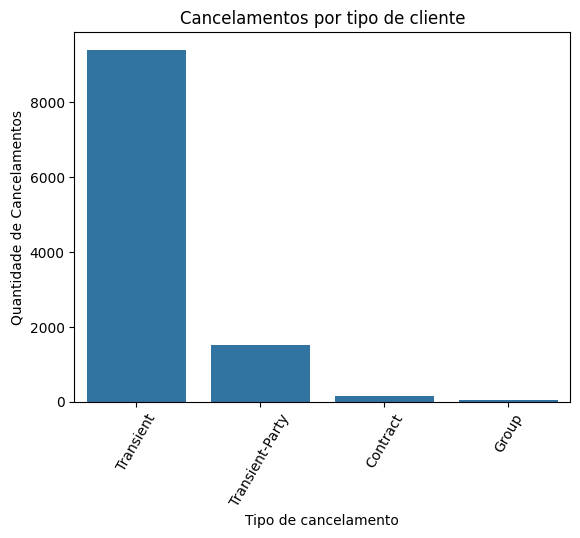

In [ ]:
cancelamentos_por_cliente = resort_hotel.groupby("CustomerType")['IsCanceled'].sum().to_frame().reset_index().sort_values(by = 'IsCanceled', ascending = False)

# Criando um gráfico de barras
sns.barplot(x = cancelamentos_por_cliente['CustomerType'], y = cancelamentos_por_cliente['IsCanceled'])

plt.xlabel('Tipo de cancelamento')
plt.ylabel('Quantidade de Cancelamentos')
plt.xticks(rotation = 60)
plt.title('Cancelamentos por tipo de cliente')
plt.savefig('cancelamentos_tipo_cliente_resort.png')

plt.show()

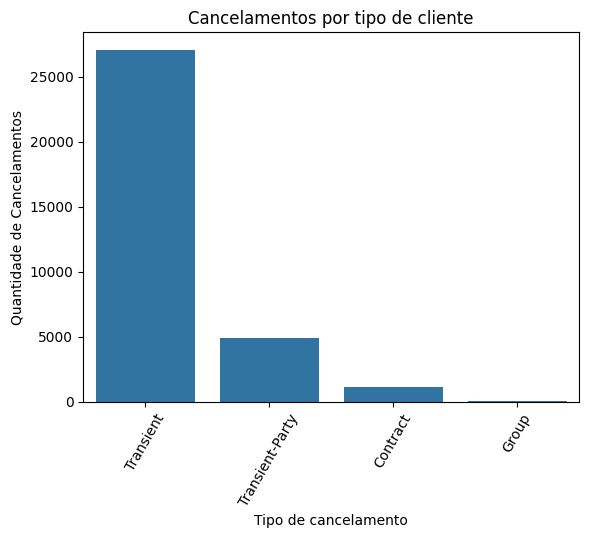

In [ ]:
cancelamentos_por_cliente2 = city_hotel.groupby("CustomerType")['IsCanceled'].sum().to_frame().reset_index().sort_values(by = 'IsCanceled', ascending = False)

# Criando um gráfico de barras
sns.barplot(x = cancelamentos_por_cliente2['CustomerType'], y = cancelamentos_por_cliente2['IsCanceled'])

plt.xlabel('Tipo de cancelamento')
plt.ylabel('Quantidade de Cancelamentos')
plt.xticks(rotation = 60)
plt.title('Cancelamentos por tipo de cliente')
plt.savefig('cancelamentos_tipo_cliente_city.png')

plt.show()

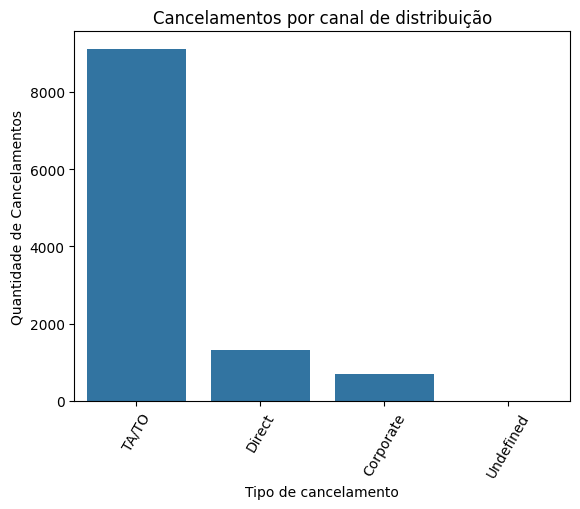

In [ ]:
cancelamentos_por_canal = resort_hotel.groupby("DistributionChannel")['IsCanceled'].sum().to_frame().reset_index().sort_values(by = 'IsCanceled', ascending = False)

# Criando um gráfico de barras
sns.barplot(x = cancelamentos_por_canal['DistributionChannel'], y = cancelamentos_por_canal['IsCanceled'])

plt.xlabel('Tipo de cancelamento')
plt.ylabel('Quantidade de Cancelamentos')
plt.xticks(rotation = 60)
plt.title('Cancelamentos por canal de distribuição')
plt.savefig('cancelamentos_canal_resort.png')

plt.show()

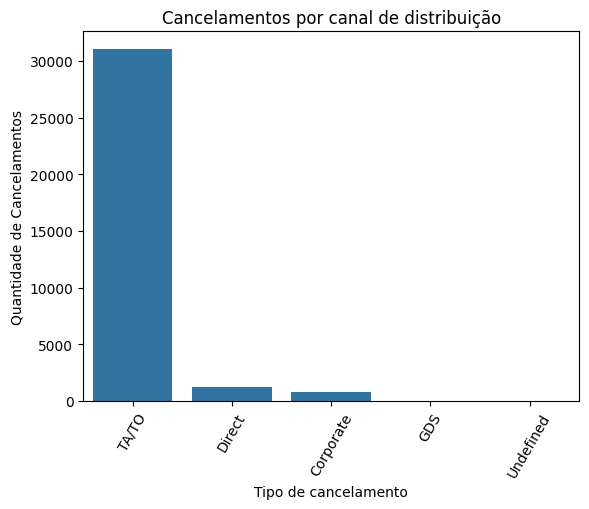

In [38]:
cancelamentos_por_canal2 = city_hotel.groupby("DistributionChannel")['IsCanceled'].sum().to_frame().reset_index().sort_values(by = 'IsCanceled', ascending = False)

# Criando um gráfico de barras
sns.barplot(x = cancelamentos_por_canal2['DistributionChannel'], y = cancelamentos_por_canal2['IsCanceled'])

plt.xlabel('Tipo de cancelamento')
plt.ylabel('Quantidade de Cancelamentos')
plt.xticks(rotation = 60)
plt.title('Cancelamentos por canal de distribuição')

plt.show()

TA/TO - Agências de turismo são os que mais geram cancelamentos

##Conclusões

A investigação dos dados revelou padrões nos cancelamentos, abrindo caminho para uma compreensão mais profunda do perfil dos clientes propensos a cancelar e dos períodos de maior risco.

**Perfil dos cancelamentos**:

- **Clientes transitórios**: Hospedagens curtas (até 3 dias) apresentam maior propensão a cancelamentos.
Reservas via agências de turismo: Clientes que reservam por meio de agências de turismo cancelam com mais frequência.
Períodos de maior risco:

- **Abril a outubro**: A incidência de cancelamentos aumenta significativamente entre esses meses.
Dobro de cancelamentos em 2 anos:

- **Preocupante**: O número de cancelamentos dobrou nos últimos 2 anos, exigindo medidas proativas.
Indo além da análise:

Compreender as motivações por trás dos cancelamentos é crucial para formular soluções eficazes. Pesquisas de satisfação, acompanhamento pós-reserva e análise de feedback podem revelar os motivos que levam os clientes a cancelar.

**Possíveis soluções**:

- **Pacotes e tarifas personalizadas**: Oferecer pacotes e tarifas especiais para clientes transitórios pode aumentar o atrativo e reduzir cancelamentos.

- **Fortalecimento da comunicação**: Manter contato frequente com clientes que reservaram por meio de agências de turismo pode fortalecer o compromisso e reduzir cancelamentos.
- **Promoções estratégicas**: Oferecer promoções e descontos durante os períodos de maior risco (abril a outubro) pode estimular reservas e reduzir cancelamentos